# OP-2 Young's double-slit experiment
by H cyan

huangzw29@mail2.sysu.edu.cn

2021.5.2

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gamaLIST = [0.5, 0.7, 0.95]
R = 0.05 + 0.0802
lamb = 550e-9
d = 0.1e-3
L = 1.5
I0 = 10

## Area expanded light source model

In [3]:
uLIST = []
u = sp.symbols('u')
for gama in gamaLIST:
    f = gama - abs(sp.sin(u) / u)
    uLIST.append(sp.nsolve(f, 1))
    
print(np.array(uLIST))
bLIST = np.array(uLIST)*R*lamb / (np.pi*d)
print(bLIST)

[1.89549426703398 1.41018537664816 0.551910978621862]
[0.000432062203567996 0.000321440065459741 0.000125803531956795]


<ipython-input-4-72341d61c4f6>:3: RuntimeWarning: invalid value encountered in true_divide
  Gama = abs(np.sin(U)/U)


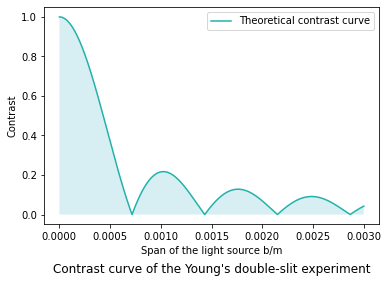

In [4]:
B = np.linspace(0, 0.003, 10000)
U = np.pi*B*d / (R*lamb)
Gama = abs(np.sin(U)/U)

plt.plot(B, Gama, color = 'lightseagreen', label = 'Theoretical contrast curve')
plt.legend()
plt.xlabel('Span of the light source b/m')
plt.ylabel('Contrast')
plt.title("Contrast curve of the Young's double-slit experiment", y=-0.25)
plt.fill_between(B, 0, Gama, facecolor='powderblue', interpolate=True, alpha = 0.5)

## Double point light source model

0.9053009020226309


Text(0.007, 5, 'gama=91%\nb=0.0001')

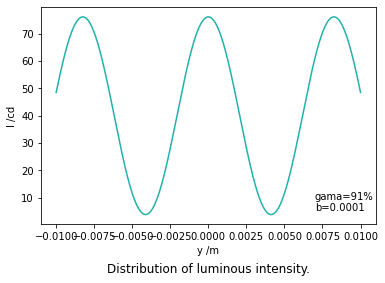

In [5]:
b = 0.0001
y = np.linspace(-0.01, 0.01, 10000)
I1 = 4*I0* ( np.cos( (np.pi/lamb)*( d*(y/L+b/(2*R)) ) ) )**2 
I2 = 4*I0* ( np.cos( (np.pi/lamb)*( d*(y/L-b/(2*R)) ) ) )**2 
I = I1 + I2
Imax = I.max()
Imin = I.min()
Gama = (Imax-Imin)/(Imax+Imin)
print(Gama)
plt.plot(y, I, color = 'lightseagreen')
plt.xlabel('y /m')
plt.ylabel('I /cd')
plt.title('Distribution of luminous intensity.', y=-0.25)
plt.text(0.007, 5, 'gama={:.2g}%\nb=0.0001'.format(Gama*100))

0.00023870387038703872


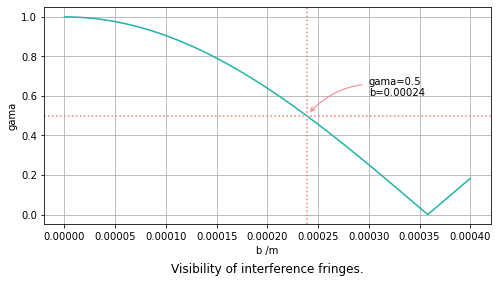

In [6]:
B = np.linspace(0, 0.0004, 10000).tolist()
GAma = []
for i in B:
    y = np.linspace(-0.01, 0.01, 1000)
    I1 = 4*I0* ( np.cos( (np.pi/lamb)*( d*(y/L+i/(2*R)) ) ) )**2 
    I2 = 4*I0* ( np.cos( (np.pi/lamb)*( d*(y/L-i/(2*R)) ) ) )**2 
    I = I1 + I2
    Imax = I.max()
    Imin = I.min()
    g = (Imax-Imin)/(Imax+Imin)
    GAma.append(g)
    if g >= 0.4999 and g<= 0.5001:
        b0 = i
        print(i)

plt.figure(figsize=(8,4))
plt.plot(B, np.array(GAma), color='lightseagreen')
plt.xlabel('b /m')
plt.ylabel('gama')
plt.axhline(y = 0.5, ls=':', color='lightcoral')
plt.axvline(x = b0, ls=':', color='lightcoral')
plt.annotate(text='gama=0.5\nb={:.2g}'.format(b0) , xy=(b0, 0.5), xytext=(0.0003, 0.6), arrowprops=dict(arrowstyle='->',
                                color='lightcoral',
                                shrinkA = 5,
                                shrinkB = 5,
                                connectionstyle="arc3,rad=0.3"))
plt.title('Visibility of interference fringes.', y=-0.25)
plt.grid()

## EXP

In [7]:
df = pd.read_excel(r'0.95 0.04\0.95.xlsx', header=None)
df.head(10)

0         1         2         3         4         5         6    \
0  0.002501  0.002555  0.002613  0.002677  0.002746  0.002821  0.002903   
1  0.002504  0.002558  0.002616  0.002680  0.002749  0.002824  0.002907   
2  0.002511  0.002565  0.002623  0.002687  0.002756  0.002832  0.002914   
3  0.002521  0.002575  0.002634  0.002698  0.002768  0.002843  0.002926   
4  0.002535  0.002589  0.002649  0.002713  0.002783  0.002859  0.002943   
5  0.002553  0.002608  0.002667  0.002732  0.002803  0.002880  0.002963   
6  0.002575  0.002630  0.002690  0.002755  0.002827  0.002904  0.002989   
7  0.002601  0.002657  0.002717  0.002783  0.002855  0.002934  0.003019   
8  0.002631  0.002688  0.002749  0.002816  0.002888  0.002968  0.003054   
9  0.002666  0.002723  0.002785  0.002853  0.002927  0.003007  0.003095   

        7         8         9    ...       118       119       120       121  \
0  0.002993  0.003092  0.003199  ...  0.002152  0.002175  0.002201  0.002229   
1  0.002997  0.003095  0.003203  ...  0.002154  0.002178  0.002204  0.002231   
2  0.003005  0.003103  0.003212  ...  0.002160  0.002184  0.002210  0.002237   
3  0.003017  0.003116  0.003225  ...  0.002169  0.002193  0.002219  0.002247   
4  0.003034  0.003134  0.003243  ...  0.002181  0.002205  0.002231  0.002259   
5  0.003055  0.003156  0.003266  ...  0.002196  0.002221  0.002247  0.002275   
6  0.003081  0.003183  0.003294  ...  0.002215  0.002240  0.002266  0.002295   
7  0.003113  0.003215  0.003327  ...  0.002237  0.002262  0.002289  0.002318   
8  0.003149  0.003252  0.003366  ...  0.002263  0.002289  0.002316  0.002345   
9  0.003190  0.003295  0.003410  ...  0.002293  0.002319  0.002346  0.002376   

        122       123       124       125       126       127  
0  0.002259  0.002291  0.002327  0.002365  0.002407  0.002452  
1  0.002261  0.002294  0.002329  0.002368  0.002409  0.002455  
2  0.002267  0.002300  0.002335  0.002374  0.002416  0.002461  
3  0.002277  0.002309  0.002345  0.002384  0.002426  0.002471  
4  0.002289  0.002322  0.002358  0.002397  0.002439  0.002485  
5  0.002306  0.002339  0.002375  0.002414  0.002456  0.002503  
6  0.002325  0.002359  0.002395  0.002435  0.002478  0.002524  
7  0.002349  0.002383  0.002419  0.002459  0.002503  0.002550  
8  0.002376  0.002410  0.002447  0.002488  0.002532  0.002579  
9  0.002408  0.002442  0.002480  0.002521  0.002565  0.002613  

[10 rows x 128 columns]

<AxesSubplot:>

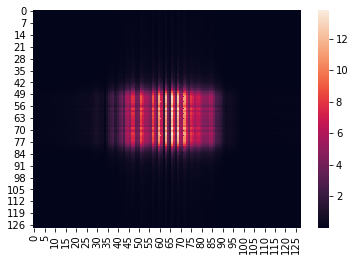

In [8]:
sns.heatmap(df)

0.9589134137737525


Text(0.013333333333333334, 146.74551853575994, 'gama=96%')

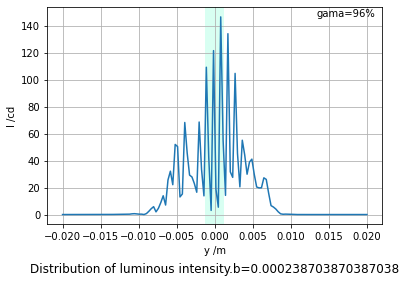

In [9]:
start = 60
end = 68
imax = (df.loc[64, start:end].max())**2
imin = (df.loc[64, start:end].min())**2
print((imax-imin)/(imax+imin))

screen = 0.04
plt.plot(np.linspace(-screen/2, screen/2, 128), (df.loc[64])**2)
plt.grid()
plt.axvspan(xmin=start*screen/128-screen/2, xmax=end*screen/128-screen/2, facecolor="aquamarine", alpha=0.3)
plt.xlabel('y /m')
plt.ylabel('I /cd')
plt.title('Distribution of luminous intensity.b=0.000238703870387038', y=-0.25)
plt.text(screen/3, imax, 'gama={:.2g}%'.format(((imax-imin)/(imax+imin))*100))